In [5]:
## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
loan_data = pd.read_csv("loan.csv")

In [3]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_data.shape

(39717, 111)

In [5]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


many columns with single values are being removed , which are not contributing

In [8]:
loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


there are 48 columns out of which few corresponds to the post approval of loan
1) before approval of loan few prerequisite has to be checked (user details and driving factor)
2) loan contributing preapproval parameters which indirectly doesn't support has to be removed
3) "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","out_prncp_inv" , "total_pymnt_inv ","funded_amnt": this columns are removed based on its less weightage to preapproval process

In [15]:
loan_data.drop(labels = ["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt"],axis=1,inplace=True)

In [17]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,chargeoff_within_12_mths
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,3513.330000,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,0.0


In [18]:
loan_data.shape

(39717, 36)

In [19]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'chargeoff_within_12_mths'],
      dtype='object')

remove the record of the current loan status (we cannot do anything with the current loan status)

In [20]:
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

check for any missing value

In [21]:
(loan_data.isna().sum()/len(loan_data.index))*100

loan_amnt                     0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.677761
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
mths_since_last_delinq       64.559193
mths_since_last_record       92.897322
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.129611
total_acc                     0.000000
out_prncp                

In [22]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_amnt                 38577 non-null  int64  
 1   funded_amnt_inv           38577 non-null  float64
 2   term                      38577 non-null  object 
 3   int_rate                  38577 non-null  object 
 4   installment               38577 non-null  float64
 5   grade                     38577 non-null  object 
 6   sub_grade                 38577 non-null  object 
 7   emp_length                37544 non-null  object 
 8   home_ownership            38577 non-null  object 
 9   annual_inc                38577 non-null  float64
 10  verification_status       38577 non-null  object 
 11  issue_d                   38577 non-null  object 
 12  loan_status               38577 non-null  object 
 13  purpose                   38577 non-null  object 
 14  dti   

In [23]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

the above value counts shows that the predeccesor has more frequency than the successor value

In [24]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [25]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

data standardizing

In [26]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [27]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [30]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [31]:
loan_data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,chargeoff_within_12_mths
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,5863.155187,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,0.0
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,1008.710000,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,0.0
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,3005.666844,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,0.0
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,12231.890000,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,0.0
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,5632.210000,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,0.0


In [32]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'chargeoff_within_12_mths'],
      dtype='object')

In [35]:
loan_data = loan_data.loc[:,('loan_amnt','term','int_rate','installment',
       'grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc','issue_d', 'loan_status', 'purpose', 'dti','earliest_cr_line', 'inq_last_6mths','open_acc',
       'pub_rec', 'revol_util')]
loan_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util
0,5000,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7
1,2500,60 months,15.27,59.83,C,C4,0,RENT,30000.0,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4
2,2400,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5
3,10000,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0
5,5000,36 months,7.90,156.46,A,A4,3,RENT,36000.0,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,36 months,8.07,78.42,A,A4,4,MORTGAGE,110000.0,Jul-07,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,13.1
39713,8500,36 months,10.28,275.38,C,C1,3,RENT,18000.0,Jul-07,Fully Paid,credit_card,6.40,Dec-86,1,6,0,26.9
39714,5000,36 months,8.07,156.84,A,A4,0,MORTGAGE,100000.0,Jul-07,Fully Paid,debt_consolidation,2.30,Oct-98,0,11,0,19.4
39715,5000,36 months,7.43,155.38,A,A2,0,MORTGAGE,200000.0,Jul-07,Fully Paid,other,3.72,Nov-88,0,17,0,0.7


outlier

<AxesSubplot:xlabel='annual_inc'>

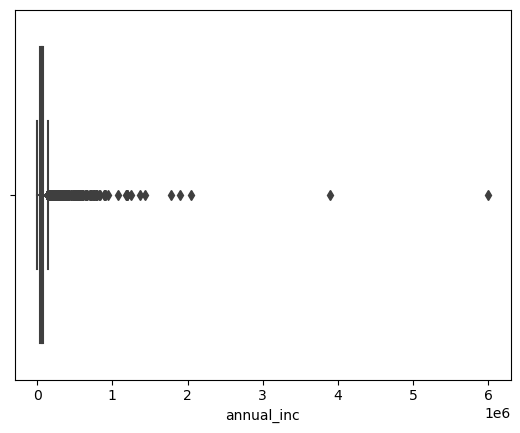

In [36]:
sns.boxplot(loan_data['annual_inc'])

indicating the presence of outliers:therefore removing them. removing outliers after 0.95

In [37]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [38]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

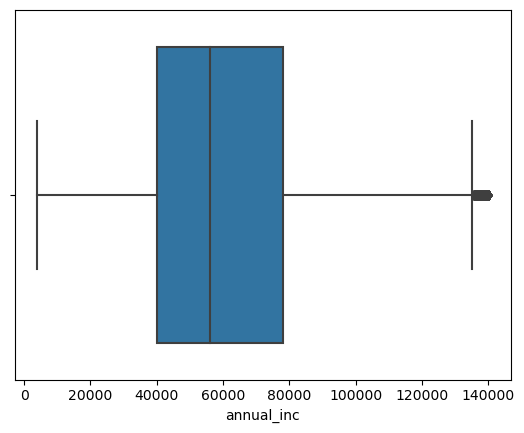

In [39]:
sns.boxplot(loan_data.annual_inc)

"annual_inc" data looks good and proceeding next.
analyse other numeric value which has outliers such as
dti
loan_amnt


<AxesSubplot:xlabel='dti'>

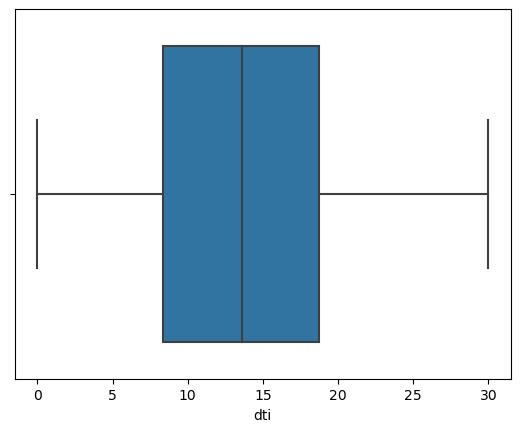

In [40]:
sns.boxplot(loan_data.dti)

<AxesSubplot:xlabel='loan_amnt'>

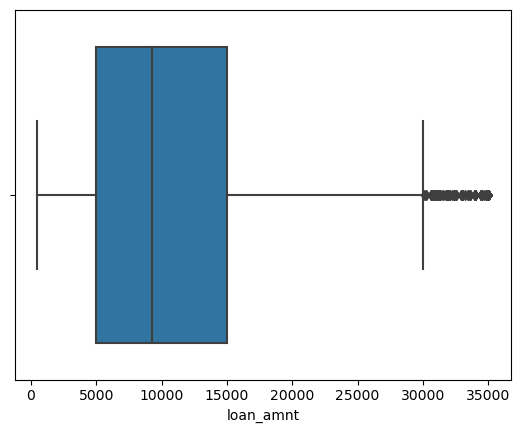

In [41]:
sns.boxplot(loan_data.loan_amnt)

In [42]:
loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

Visualizing the data
visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

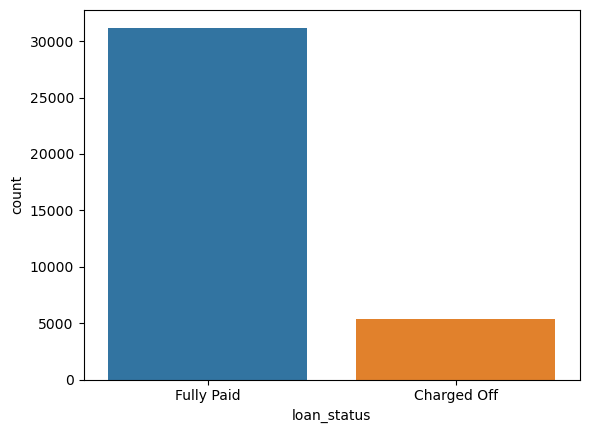

In [44]:
sns.countplot(x = 'loan_status', data = loan_data)

In [45]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

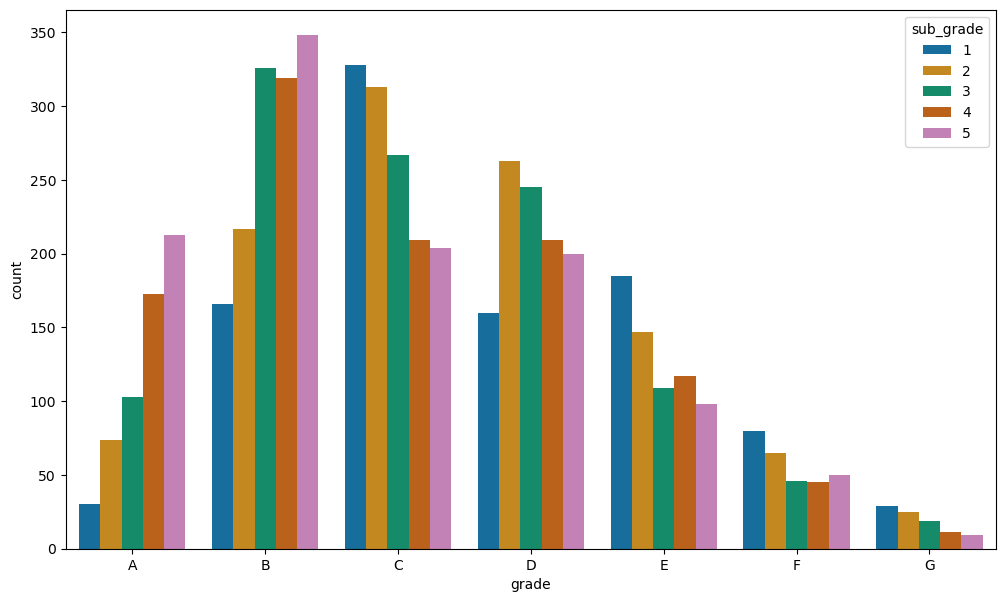

In [46]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

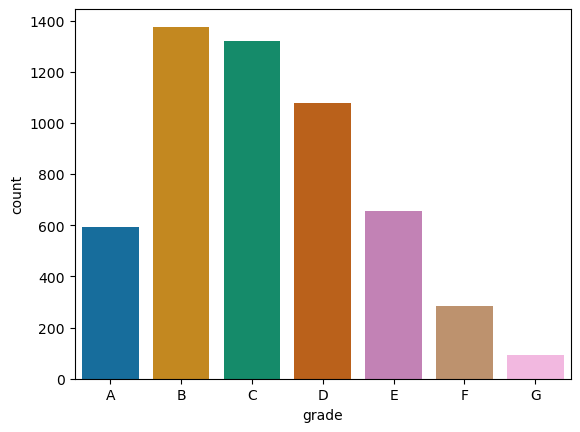

In [47]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Analyzing home ownership


In [48]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [49]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [50]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

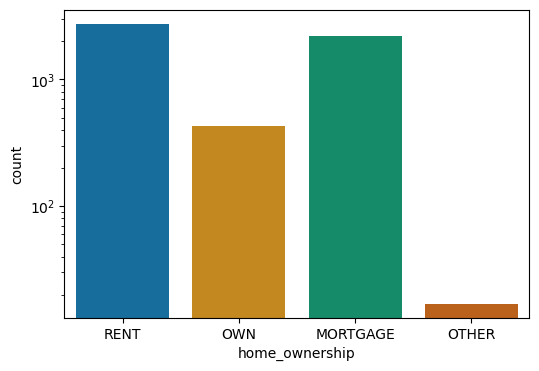

In [51]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='purpose'>

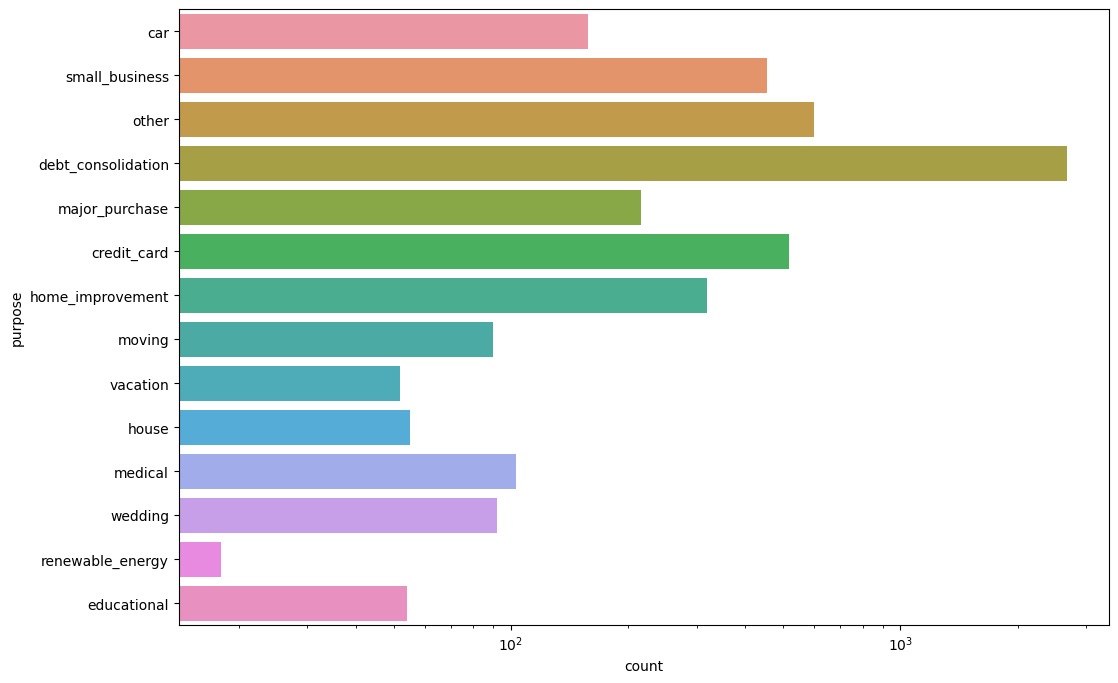

In [52]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [54]:
#creating bins for int_rate,open_acc,revol_util,total_acc
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [55]:
# Viewing new bins created
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,...,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,int_rate_groups,open_acc_groups,revol_util_groups,annual_inc_groups
0,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Dec-11,...,27.65,Jan-85,1,3,0,83.7,9%-13%,2-10,80-100,3k-31k
1,2500,60 months,15.27,59.83,C,4,0,RENT,30000.0,Dec-11,...,1.00,Apr-99,5,3,0,9.4,13%-17%,2-10,0-20,3k-31k
2,2400,36 months,15.96,84.33,C,5,10,RENT,12252.0,Dec-11,...,8.72,Nov-01,2,2,0,98.5,13%-17%,2-10,80-100,3k-31k
3,10000,36 months,13.49,339.31,C,1,10,RENT,49200.0,Dec-11,...,20.00,Feb-96,1,10,0,21.0,13%-17%,2-10,20-40,31k-58k
5,5000,36 months,7.90,156.46,A,4,3,RENT,36000.0,Dec-11,...,11.20,Nov-04,3,9,0,28.3,5%-9%,2-10,20-40,31k-58k


<AxesSubplot:xlabel='emp_length', ylabel='count'>

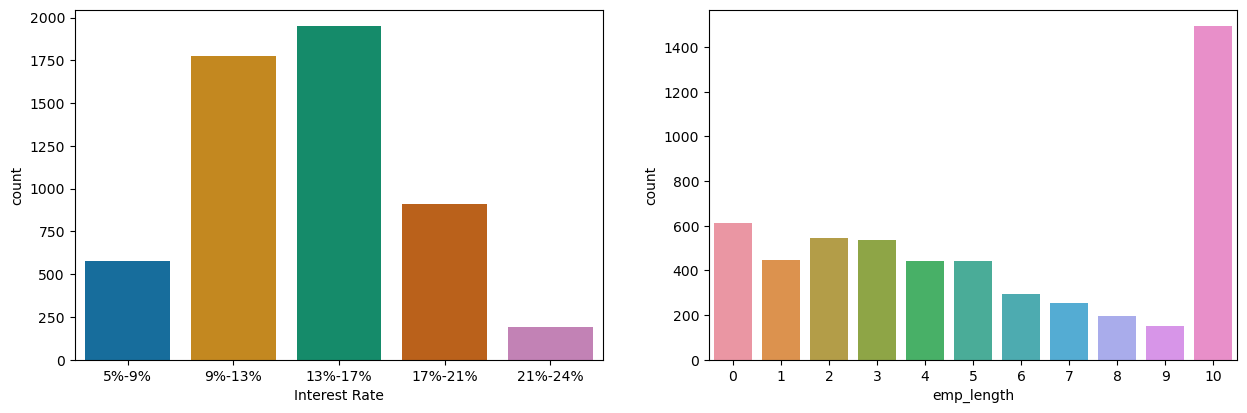

In [56]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

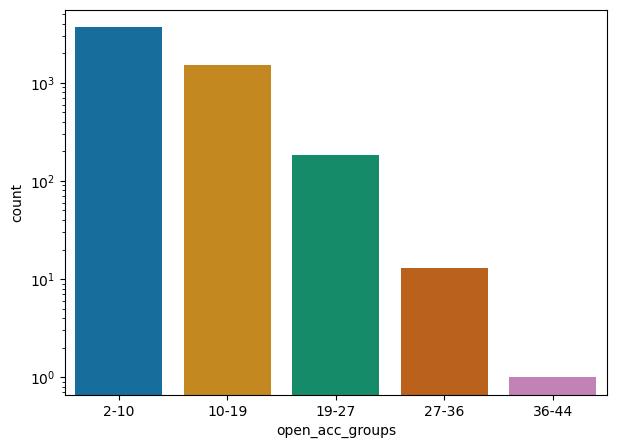

In [57]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

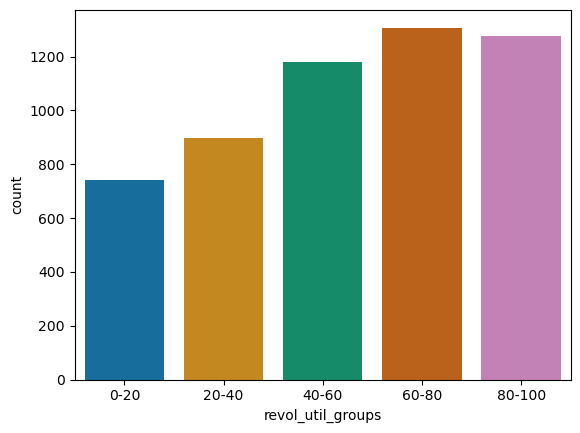

In [58]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

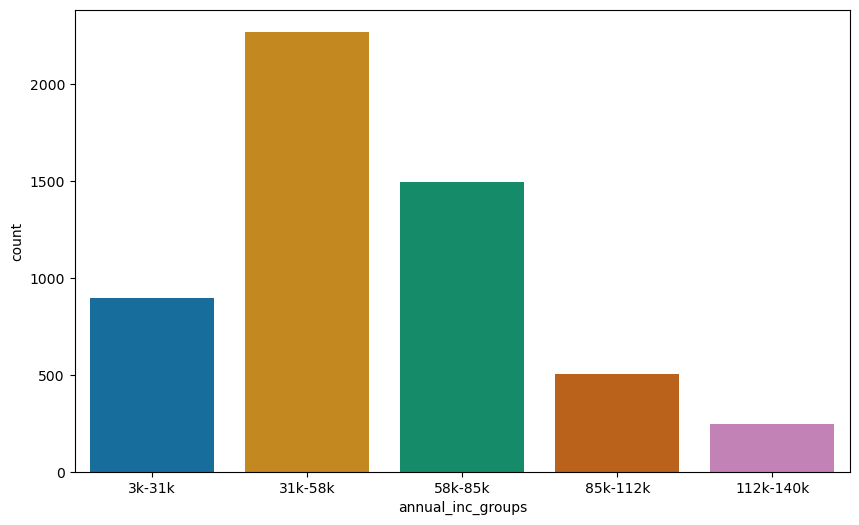

In [60]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

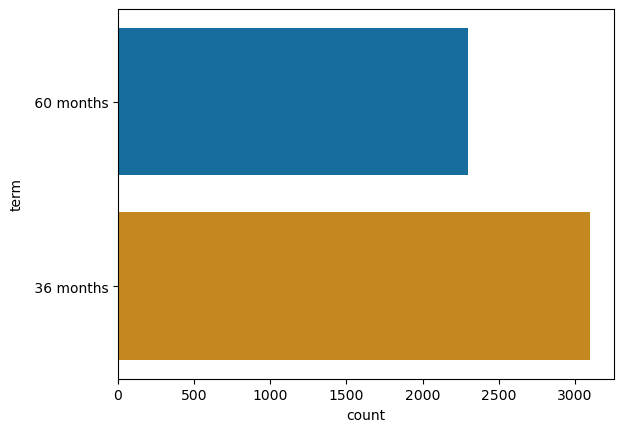

In [61]:
sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

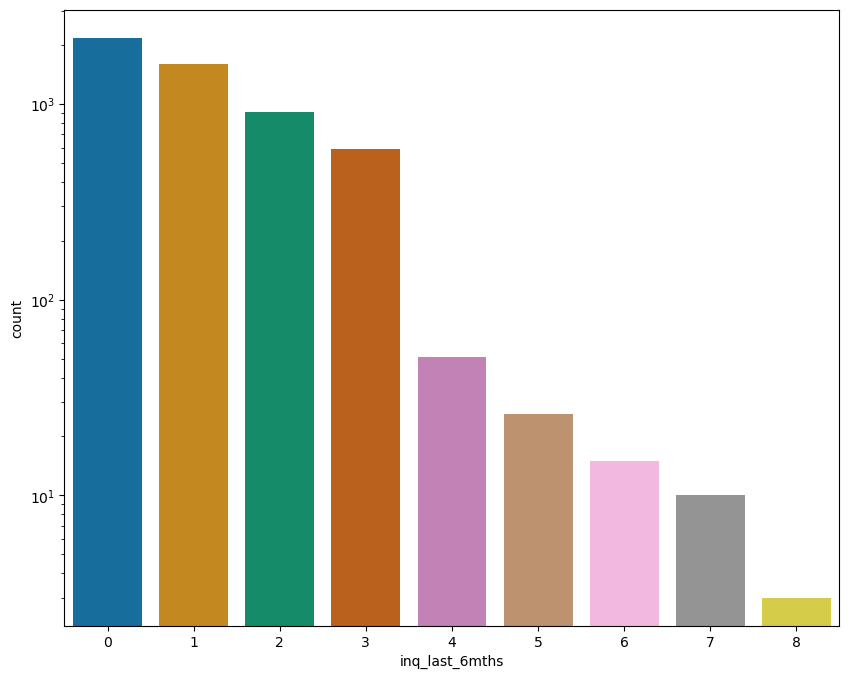

In [63]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

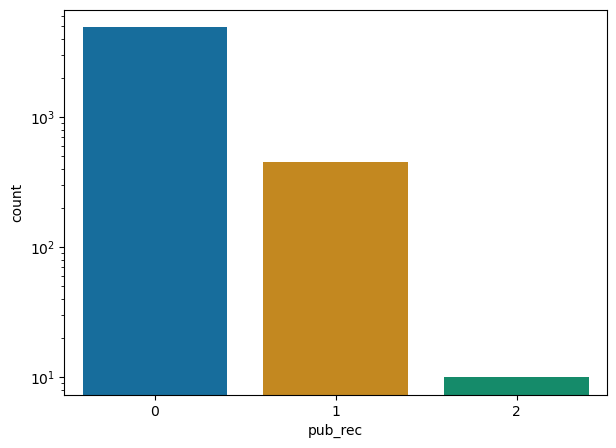

In [64]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [65]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [66]:
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,issue_d,...,inq_last_6mths,open_acc,pub_rec,revol_util,int_rate_groups,open_acc_groups,revol_util_groups,annual_inc_groups,issue_month,issue_year
0,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,Dec-11,...,1,3,0,83.7,9%-13%,2-10,80-100,3k-31k,Dec,2011
1,2500,60 months,15.27,59.83,C,4,0,RENT,30000.0,Dec-11,...,5,3,0,9.4,13%-17%,2-10,0-20,3k-31k,Dec,2011
2,2400,36 months,15.96,84.33,C,5,10,RENT,12252.0,Dec-11,...,2,2,0,98.5,13%-17%,2-10,80-100,3k-31k,Dec,2011
3,10000,36 months,13.49,339.31,C,1,10,RENT,49200.0,Dec-11,...,1,10,0,21.0,13%-17%,2-10,20-40,31k-58k,Dec,2011
5,5000,36 months,7.90,156.46,A,4,3,RENT,36000.0,Dec-11,...,3,9,0,28.3,5%-9%,2-10,20-40,31k-58k,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

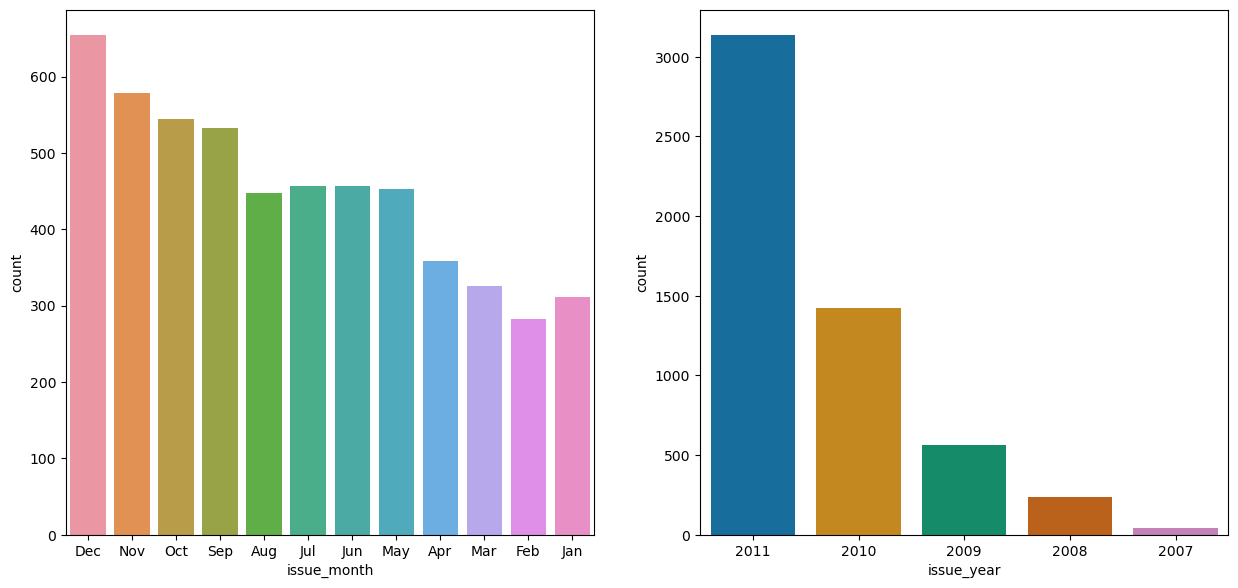

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_data[loan_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_data[loan_data['loan_status']=='Charged Off'])

Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011

Analyzing installment,dti, loan_amnt

In [70]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

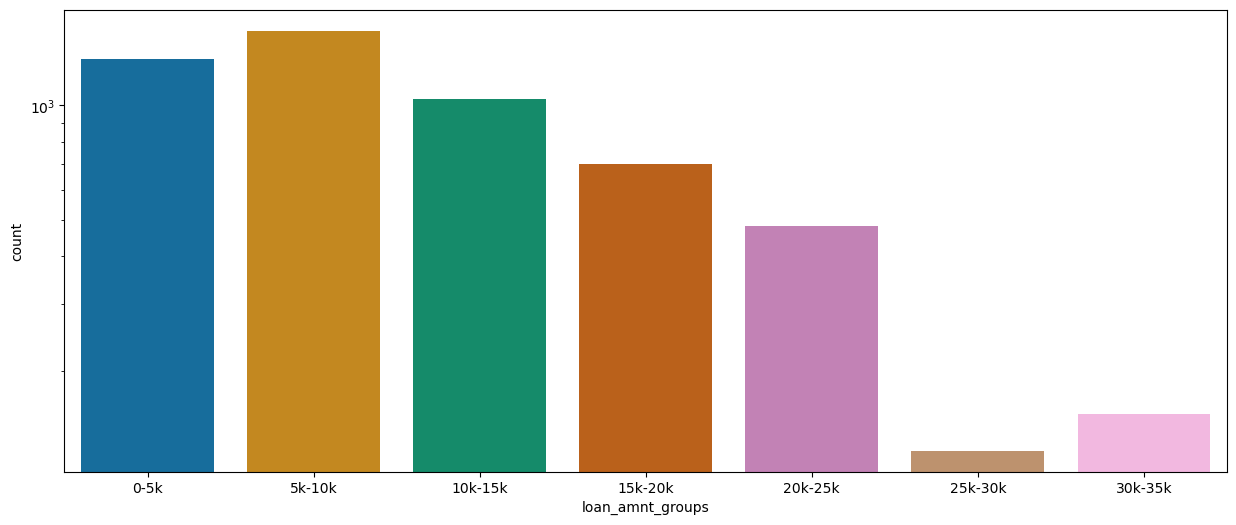

In [72]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

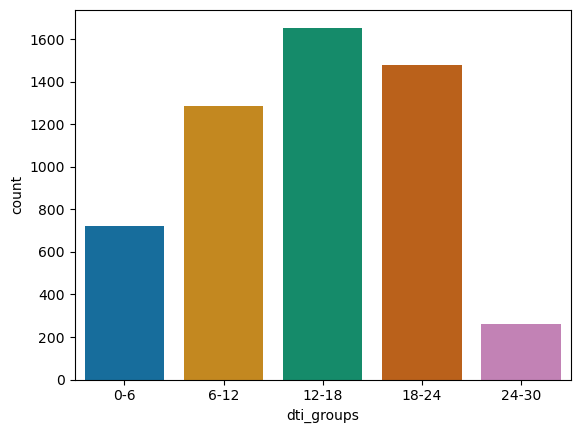

In [73]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

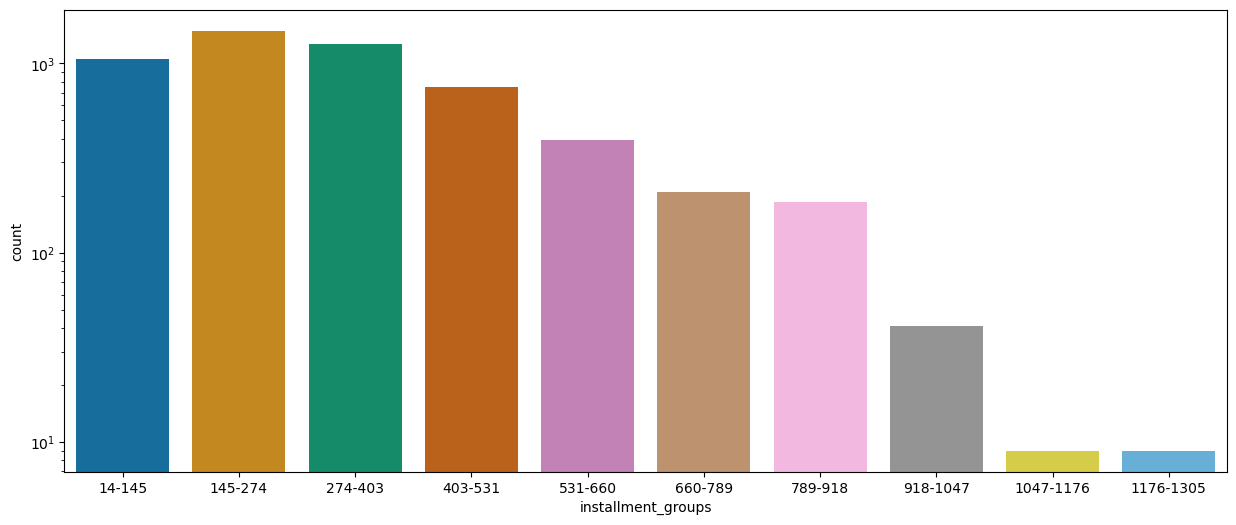

In [74]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

Observations

analysis for the charge of loan is as per the following conditions:

Probability of defaulting occurs at:

Applicants having house_ownership as 'RENT' and 'MORTGAGE', who use the loan to clear other debts, who receive interest at the rate of 13-17%, who have an income of range 31K to 58K, who have 20-37 open_acc, with employement length of 10,Loan amount is between 5429 - 10357, Dti is between 12-18
When monthly installments are between 145-274, there are more defaulters in 36 months,(when no of enquires in last six month is zero,When the number of derogatory public records is 0 and
When the purpose is 'debt_consolidation'.
